In [1]:
import datetime
import os
from mdcrow import MDCrow

In [2]:
prompt7 = "Simulate 1ZNI for 1 ns at a temperature of 300 K in water. Then, simulate it again in acetonitrile. Compute the RMSD, final secondary structure, and PCA for each simulation."
llm_var = "accounts/fireworks/models/llama-v3p1-70b-instruct"
tools = "all"
agent = MDCrow(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-23
time: 09:38:27
LLM:  accounts/fireworks/models/llama-v3p1-70b-instruct 
Temperature:  0.1


In [3]:
output = agent.run(prompt7)

Thought: To solve this problem, I need to simulate the protein 1ZNI in water and acetonitrile, and then compute the RMSD, final secondary structure, and PCA for each simulation. I will start by setting up the simulation in water.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI",
    "forcefield_files": ["amber99sbildn.xml", "tip3p.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1.0 * nanometers",
      "ewaldErrorTolerance": 0.00001,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps"

TypeError: mdcrow.tools.base_tools.analysis_tools.pca_tools.PCATool.validate_input() argument after ** must be a mapping, not str

In [ ]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

In [2]:
agent = MDCrow(ckpt_dir="ckpt_0")
registry = agent.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_0
Files found in registry: 1ZNI_093837: PDB file downloaded from RSCB
 PDBFile ID: 1ZNI_093837
 1ZNI_093847: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_093851: Initial positions for simulation sim0_093851
 top_sim0_094922: Initial positions for simulation sim0_094922
 sim0_094922: Basic Simulation of Protein 1ZNI_093847
 rec0_094925: Simulation trajectory for protein 1ZNI_093847 and simulation sim0_094922
 rec1_094925: Simulation state log for protein 1ZNI_093847 and simulation sim0_094922
 rec2_094925: Simulation pdb frames for protein 1ZNI_093847 and simulation sim0_094922
 rmsd_1ZNI_093847: RMSD for 1ZNI_093847
 fig0_143130: RMSD plot for 1ZNI_093847
 rec0_143133: dssp values for trajectory with id: rec0_094925


In [3]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path != top_path
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_094925 and top_sim0_093851 exist


In [10]:
import mdtraj as md
traj = md.load(traj_path, top=top_path)
print(f"Simulation with {traj.n_atoms} atoms for {traj.n_frames} frames.")

#secondary structure
traj = traj[-1]
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Simulation with 19766 atoms for 5010 frames.
Number of residues in chains:  6
Number of residues in sheets:  9
Number of residues in helices:  44
Number of residues in coils:  49


In [6]:
import re
import os

matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path_1 = registry.get_mapped_path(fig_id1)

assert os.path.exists(fig_path_1)
print(f'It is asserted that file path for {fig_id1} exist')

It is asserted that file path for fig0_143130 exist


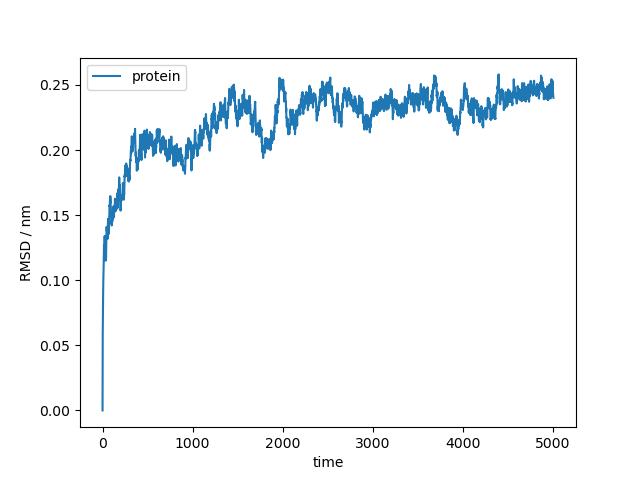

In [7]:
from IPython.display import Image
Image(filename=fig_path_1)